La transformée de Fourier discrète $\mathcal{F}$ (*discrete Fourier transform* - DFT) transforme une séquence de $N$ nombres complexes $\{x_0, x_1, \dots x_{N-1}\}$ en autre séquence de $N$ nombres complexes $\{X_0, X_1, \dots X_{N-1}\}$ définis par l'expression:

$$\forall k \in [\![0, N-1]\!], X_k = \sum_{j=0}^{N-1}x_j exp(-2i\pi\frac{kj}{N})$$

Remarque: On trouve parfois $k \in [\![-N/2, N/2 [\![$ avec des références à des "fréquences" négatives.

La transformée inverse s'écrit:

$$\forall k \in [\![0, N-1]\!], x_k = \frac{1}{N}\sum_{j=0}^{N-1}X_j exp(2i\pi\frac{kj}{N})$$

**Noter pour la transformée inverse le facteur de normalisation $\frac{1}{N}$ et la différence de signe dans l'exponentielle**. S'agissant du facteur de normalisation, celui-ci peut parfois se trouver dans la transformée et non dans l'inverse, ou parfois un $\frac{1}{\sqrt{n}}$ dans les deux. Tout est une histoire de convention, celle choisie ici est la plus répendue.

De même que les $x_i$ correspondent au signal échantillonné, les $X_i$ correspondent au spectre / à la transformée de Fourier échantillonnée du signal.

La fonction réalisant la transformation (telle que `numpy.fft.fft`) va à partir de $N$ échantillons d'un signal retourner un *array* de $N$ nombres complexes. Le coefficient $X_i$ situé au niveau du $i^e$ index de l'*array* est associé à la fréquence $i.\Delta f$ du spectre. $\Delta f$ correspond à la *frequency resolution* (aussi appelée "fréquence fondamentale") et vérifie $\Delta f = \frac{f_{sampling}}{N}$

### Fréquence limite de Nyquist
La transformée de Fourier discrète nous donne des coefficients pour les fréquences $(0, \Delta f, 2\Delta f, \dots, (N-2)\Delta f, (N-1)\Delta f)$. Toutefois il existe une fréquence limite à partir de laquelle l'analyse des coefficients ou la reconstruction du signal à partir de son spectre échantillonné peut donner lieu à des artefacts voire des conclusions éronnées. Cet effet concerne les fréquences proches de la fréquence d'échantillonnage. On comprend aisément qu'il est difficile d'apporter des informations sur la composition d'un signal échantillonné pour des fréquences proches de la fréquence d'échantillonnage. Cette fréquence limite est appelée fréquence de Nyquist (voir plus généralement les phénomènes d'*aliasing* et de *folding*) et et vérifie $f_{lim}=\frac{f_{sampling}}{2}$ Comme $\Delta f = \frac{f_{sampling}}{N}$, on en déduit que $f_{lim}=\frac{N}{2}\Delta f$. Ainsi, la moitié des fréquences retournées par la DFT se situent au dessus de cette limite.

Remarque: La fréquence limite correspond à la médiane des fréquences retournées par la DFT. Elle partage ainsi ces fréquences en deux domaines, le domaine des fréquences situé au dessus semble parfois désigné sous le terme de *fréquences négatives*.

### Cas d'un signal réel
Dans le cas d'un signal réel ($x_i$ réels), les $X_i$ restent complexes dans le cas général (seul $X_0$ est toujours réel quand les $x_i$ sont réels) mais avec la propriété: 

$$\forall k \in [\![0, N-1]\!], X_k = \overline{X}_{N-k}$$

$X_k$ et $X_{N-k}$ ont alors le même module. Cette propriété de la transformée est souvent appelée "propriété hermitienne".

https://www.tcd.ie/Physics/research/groups/mobius/teaching/Numerical%20methods%20III/PY4C01_2012_L4.pdf
https://blog.robertelder.org/fourier-coefficients-audio-signals/
https://www.analog.com/media/en/technical-documentation/dsp-book/dsp_book_Ch31.pdf
https://ethz.ch/content/dam/ethz/special-interest/mavt/dynamic-systems-n-control/idsc-dam/Lectures/Signals-and-Systems/Lectures/Fall2018/SigSys_Lect5.pdf
https://ethz.ch/content/dam/ethz/special-interest/mavt/dynamic-systems-n-control/idsc-dam/Lectures/Signals-and-Systems/Lectures/Fall2018/SigSys_Lect6.pdf

http://w3.mi.parisdescartes.fr/~eprovenz/include/Poly.pdf
http://math.univ-lyon1.fr/~benzoni/Agreg/Fourier.pdf

https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python
https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/
https://www.youtube.com/watch?v=su9YSmwZmPg

In [1]:
import numpy as np

Aliasing
Aliasing en général désigné comme l'introduction de fréquences "indésirables" dues à un échantillonnage insuffisant. Si la fréquence d'échantillonnage du signal original est en effet insuffisante, le même échantillon pourrait avoir été obtenu à partir d'autres signaux (appelés les *alias* de l'original). On comprend que plus l'échantillonnage est élevé, moins on a de risque que des signaux très différents du signal original puissent avoir générés un même échantillon.

Le taux d'échantillonnage minimal est donné par la règle dite de Nyquist. Pour un simple signal sinusoïdal de fréquence $f$, le critère stipule que la fréquence d'échantillonnage $f_s$ doit être strictement plus élevée que $2f$. Dans le cas de signaux composés de plusieurs fréquences, ceux-ci doivent être échantillonnés à une fréquence $f_s$ strictement plus élevée que le double de la plus haute fréquence composant le signal à échantillonner.

On montre (?) que les alias de $f$ sont $nf_s \pm f$ avec $n \in \mathbb{N^*}$. Ces alias apparaissent sur le spectre du signal échantillonné. Ainsi, pour la portion entre $[0, f_s[$ qui est celle retournée par la DFT, ce qui apparaît comme le symétrique de $f$ par rapport à $f_s/2$ est en fait l'alias $f_s - f$. 
https://www.youtube.com/watch?v=be8ahXPm_Vk

Pourquoi c'est un problème : si on ne sait pas à quelles fréquences correspondent les alias et quelles sont leur contribution au spectre, on ne peut pas reconstruire le signal original à partir de sa version échantillonnée (ou au moins on risque de faire des erreurs dans l'interprétation du spectre).

Aliasing: problème propre (artefact) au fait de travailler sur des signaux discrets cas problème induit par l'échantillonnage. On peut donc potentiellement y être confronté partout.

L'échantillonnage revient à multiplier notre signal dans le domaine temporel par un peigne (?). La transformée de Fourier d'un tel peigne est aussi un peigne. Dans les deux domaines, la largeur entre les dents du peigne dépend de la fréquence d'échantillonnage $f_s$. Le spectre obtenu correspond donc à la convolution de ce peigne de fréquences et de la transformée de Fourier du signal original. Le résultat dans le domaine fréquentiel (à vérifier) est la répétition à l'infini du spectre du signal original, la distance entre chaque répétition dépendant de $f_s$. Plus $f_s$ diminue, plus les répétitions se rapprochent, avant de se recouvrir (le "repliement de spectre" auquel le français fair allusion) quand on passe sous la fréquence de Nyquist. Le spectre original apparaît alors modifié par l'introduction de nouvelles fréquences liée au recouvrement. La reconstruction du signal original à partir de son spectre se fera alors avec erreur.


On échantillonne à une fréquence $f_s$ de 1Hz. Prenons l'exemple d'une caméra filmant une roue tournant dans le sens des aiguilles d'une montre. Si la roue tourne à un tour par seconde, elle nous apparaîtra immobile. Plus généralement, si elle tourne à n'importe quel multiple de $f_s$ elle nous apparaîtra immobile. Si on diminue la vitesse de rotation de la roue à 0.9 tour par seconde, la roue semble tourner lentement dans le sens inverse des aiguilles d'une montre. Toutefois sans aucune information a priori sur le sens de rotation, deux scénarii étaient possibles:  
* Est-ce la roue tourne plus lentement que un tour par minute dans le sens des aiguilles d'une montre ?
* Est-ce la roue tourne plus vite que un tour par minute dans le sens inverse des aiguilles d'une montre ?

Aliasing en général désigné comme l'introduction de fréquences "indésirables" dues à un échantillonnage insuffisant.

Intuition de bon sens: si on a un signal d'une certaine fréquence, on ne pourra l'échantillonner sans grosse perte d'information que si la fréquence d'échantillonnage est plus élevée que la fréquence du signal échantillonné.

Autre
Le fait d'avoir dans la DFT des coefficients associés à des fréquences supérieures à $f_s$ n'a rien d'anormal. La DFT est une version échantillonnée de la FT qui est définie pour toutes les fréquences. Cependant au dessus de $f_s/2$ on risque d'avoir des problèmes en utilisant ces coefficients pour reconstruire le signal (?). Par contre toutes les fréquences entre $f_s/2$ et $f_s$ sont dans une red zone du point de vue de la théorie de l'échantillonnage. 

Remarque: Le dernier coefficient est pour la fréquence $(N-1)/Nf_s$, paraît d'autant moins absurde qu'on ne peut pas aller au dessus (toute information relative à des fréquences supérieures à $f_s$ est par définition perdue ou aliasée (?)).

Facteur 2 ? Conservation de l'énergie ?

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

In [43]:
A = 2.0 # Amplitude
B = 0.0 # Offset
f = 1.0  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second
t_min = -1
t_max = 1

t = np.linspace(t_min, t_max, (t_max-t_min) * f_s, endpoint=False)
x = A*np.sin(f * 2 * np.pi * t) + B

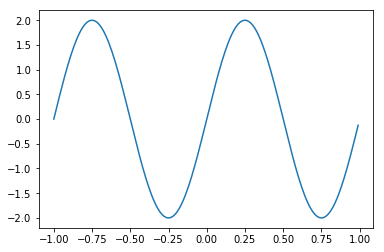

In [44]:
plt.plot(t, x);

In [49]:
len(x)

200

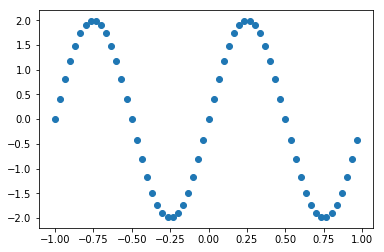

In [5]:
def compute_dft(x, n, f_s):
    resolution = f_s/n
    freqs = [k*resolution for k in range(n)]
    dft_coefs = np.fft.fft(x)
    
    print('Sampling rate: {}Hz'.format(f_s))
    print('Nyquist frequency: {}Hz'.format(f_s/2))
    print('Frequency resolution/Fundamental frequency: {:06.4f}Hz'.format(resolution))
    print('Spectrum frequency range: {:06.4f}Hz - {:06.4f}Hz'.format(resolution, max(freqs)))
    print('Number of samples: {}'.format(n))
    print('Number of DFT coefficients: {}'.format(len(dft_coefs)))

    return (freqs, np.abs(dft_coefs))

def compute_rdft(x, n, f_s):
    resolution = f_s/n
    freqs = [k*resolution for k in range(n//2+1)]
    dft_coefs = np.fft.rfft(x)
    
    print('Sampling rate: {}Hz'.format(f_s))
    print('Nyquist frequency: {}Hz'.format(f_s/2))
    print('Frequency resolution/Fundamental frequency: {:06.4f}Hz'.format(resolution))
    print('Spectrum frequency range: {:06.4f}Hz - {:06.4f}Hz'.format(resolution, max(freqs)))
    print('Number of samples: {}'.format(n))
    print('Number of DFT coefficients: {}'.format(len(dft_coefs)))

    return (freqs, np.abs(dft_coefs))

### Sinusoïde simple

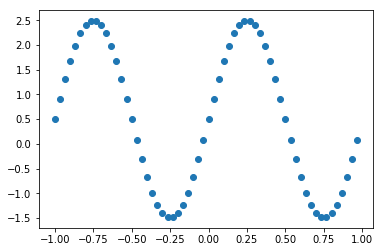

In [9]:
A = 2.0 # Amplitude
B = 0.5 # Offset
f = 1.0  # Frequency, in cycles per second, or Hertz
f_s = 30  # Sampling rate, or number of measurements per second
t_min = -1
t_max = 1

t_sample = np.linspace(t_min, t_max, (t_max-t_min) * f_s, endpoint=False)

n = len(t_sample)
x = A*np.sin(f * 2 * np.pi * t_sample) + B

plt.scatter(t_sample, x);

In [11]:
x.mean()

0.5000000000000001

Sampling rate: 30Hz
Nyquist frequency: 15.0Hz
Frequency resolution/Fundamental frequency: 0.5000Hz
Spectrum frequency range: 0.5000Hz - 29.5000Hz
Number of samples: 60
Number of DFT coefficients: 60


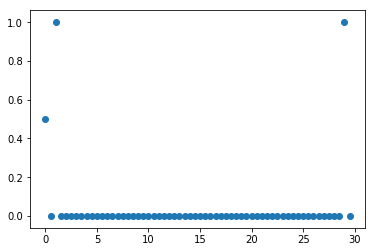

In [10]:
freqs, unscaled_dft_coefs = compute_dft(x=x, n=n, f_s=f_s)
scaled_dft_coefs = np.abs(unscaled_dft_coefs)/n

plt.scatter(freqs, scaled_dft_coefs);

Sampling rate: 30Hz
Nyquist frequency: 15.0Hz
Frequency resolution/Fundamental frequency: 0.5000Hz
Spectrum frequency range: 0.5000Hz - 15.0000Hz
Number of samples: 60
Number of DFT coefficients: 31


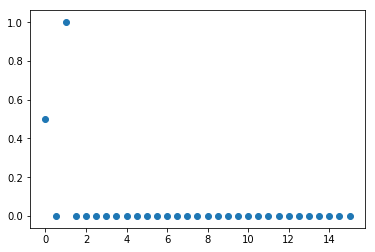

In [12]:
freqs, unscaled_dft_coefs = compute_rdft(x=x, n=n, f_s=f_s)
scaled_dft_coefs = np.abs(unscaled_dft_coefs)/n

plt.scatter(freqs, scaled_dft_coefs);

### Somme de deux sinusoïdes d'amplitudes différentes

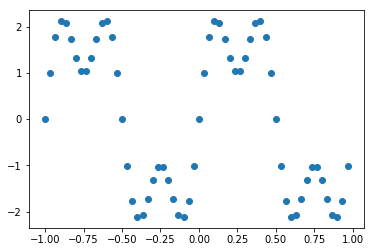

In [81]:
A = 2.0 # Amplitude
B = 0.0 # Offset
f = 1.0  # Frequency, in cycles per second, or Hertz
f_s = 30  # Sampling rate, or number of measurements per second
t_min = -1
t_max = 1

t_sample = np.linspace(t_min, t_max, (t_max-t_min) * f_s, endpoint=False)

n = len(t_sample)
x = A*np.sin(f * 2 * np.pi * t_sample) + 0.5*A*np.sin(3 * f * 2 * np.pi * t_sample) + B

plt.scatter(t_sample, x);

Sampling rate: 30Hz
Nyquist frequency: 15.0Hz
Frequency resolution/Fundamental frequency: 0.5000Hz
Spectrum frequency range: 0.5000Hz - 29.5000Hz
Number of samples: 60
Number of DFT coefficients: 60


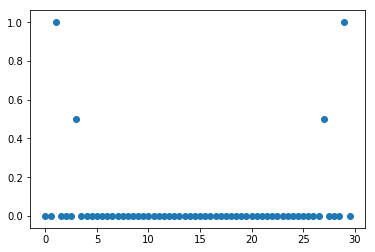

In [83]:
freqs, unscaled_dft_coefs = compute_dft(x=x, n=n, f_s=f_s)
scaled_dft_coefs = np.abs(unscaled_dft_coefs)/n

plt.scatter(freqs, scaled_dft_coefs);

Sampling rate: 30Hz
Nyquist frequency: 15.0Hz
Frequency resolution/Fundamental frequency: 0.5000Hz
Spectrum frequency range: 0.5000Hz - 15.0000Hz
Number of samples: 60
Number of DFT coefficients: 31


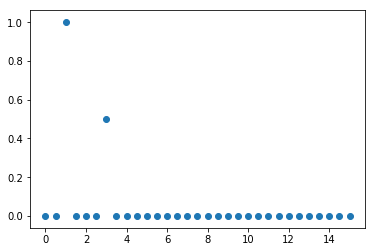

In [82]:
freqs, unscaled_dft_coefs = compute_rdft(x=x, n=n, f_s=f_s)
scaled_dft_coefs = np.abs(unscaled_dft_coefs)/n

plt.scatter(freqs, scaled_dft_coefs);

In [ ]:
A = 2.0 # Amplitude
B = 0.0 # Offset
f = 1.0  # Frequency, in cycles per second, or Hertz
f_s = 30  # Sampling rate, or number of measurements per second
t_min = -1
t_max = 1

t_sample = np.linspace(t_min, t_max, (t_max-t_min) * f_s, endpoint=False)

n = len(t_sample)
x = A*np.sin(f * 2 * np.pi * t_sample) + 0.5*A*np.sin(3 * f * 2 * np.pi * t_sample) + B

plt.scatter(t_sample, x);

### Somme de deux sinusoïdes d'amplitudes différentes dont une à la fréquence $f_s/2$

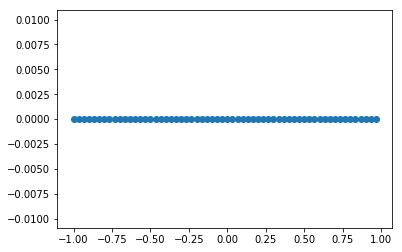

In [86]:
A = 2.0 # Amplitude
B = 0.0 # Offset
f = 1.0  # Frequency, in cycles per second, or Hertz
f_s = 30  # Sampling rate, or number of measurements per second
t_min = -1
t_max = 1

t_sample = np.linspace(t_min, t_max, (t_max-t_min) * f_s, endpoint=False)

n = len(t_sample)
# x = A*np.sin(f * 2 * np.pi * t_sample) +0.5*A*np.sin((f_s / 2) * 2 * np.pi * t_sample) + B
x = A*np.sin((f_s/2) * 2 * np.pi * t_sample)

plt.scatter(t_sample, x);

In [ ]:
freqs, unscaled_dft_coefs = compute_dft(x=x, n=n, f_s=f_s)
scaled_dft_coefs = np.abs(unscaled_dft_coefs)/n

plt.scatter(freqs, scaled_dft_coefs);

In [ ]:
freqs, unscaled_dft_coefs = compute_rdft(x=x, n=n, f_s=f_s)
scaled_dft_coefs = np.abs(unscaled_dft_coefs)/n

plt.scatter(freqs, scaled_dft_coefs);

$\Delta f = \frac{f_s}{N} = \frac{1 Hz}{200} = 0.005 Hz$

$N = 200$, retourne donc un array indexé de $0$ à $\frac{N}{2} = 100$ donc de longueur $101$

f et -f on la même TF ? Non mais les coef ont le même module.